In [21]:
import os
from matplotlib import pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions

classes = ['bags', 'cups', 'electric_socket', 'glasses', 'pens', 'phone', 'plants', 'scissor', 'water_container']
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 

train_batches = train_datagen.flow_from_directory(directory='datas', \
target_size=(224,224), batch_size=64,classes=classes)

Found 885 images belonging to 9 classes.


In [22]:
imgs, labels = next(train_batches)

In [23]:
train_batches.class_indices

{'bags': 0,
 'cups': 1,
 'electric_socket': 2,
 'glasses': 3,
 'pens': 4,
 'phone': 5,
 'plants': 6,
 'scissor': 7,
 'water_container': 8}

In [24]:
X = imgs
y = labels

In [25]:
X.shape

(64, 224, 224, 3)

In [26]:
y.shape

(64, 9)

# CNN MODEL

In [27]:
num_classes = 9
input_shape = X[0].shape
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 186624)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
training = model.fit(X,y, epochs=13)

Epoch 1/13
2/2 [==============================] - 4s 1s/step - loss: 43.4093 - accuracy: 0.0781
Epoch 2/13
2/2 [==============================] - 2s 856ms/step - loss: 37.3546 - accuracy: 0.3438
Epoch 3/13
2/2 [==============================] - 2s 926ms/step - loss: 11.8292 - accuracy: 0.5000
Epoch 4/13
2/2 [==============================] - 2s 933ms/step - loss: 3.8063 - accuracy: 0.6094
Epoch 5/13
2/2 [==============================] - 2s 1s/step - loss: 1.3821 - accuracy: 0.6562
Epoch 6/13
2/2 [==============================] - 2s 1s/step - loss: 0.6414 - accuracy: 0.7500
Epoch 7/13
2/2 [==============================] - 2s 1s/step - loss: 0.1643 - accuracy: 0.9844
Epoch 8/13
2/2 [==============================] - 2s 880ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/13
2/2 [==============================] - 2s 1s/step - loss: 0.0286 - accuracy: 1.0000
Epoch 10/13
2/2 [==============================] - 2s 899ms/step - loss: 1.9438e-04 - accuracy: 1.0000
Epoch 11/13
2/2 [==========

In [31]:
score = model.evaluate(X, y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 4.667298526328523e-06
Test accuracy: 1.0


<AxesSubplot:>

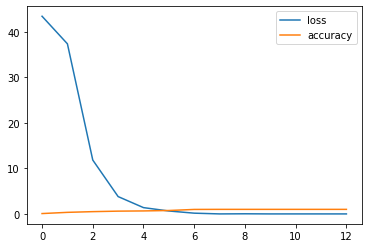

In [32]:
import pandas as pd 
logs = pd.DataFrame(training.history)
logs.plot()

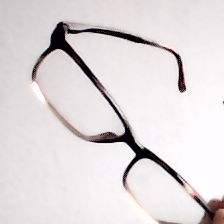

In [33]:
X_test = load_img('testdata/test.png', target_size=(224, 224)) 
X_test

In [14]:
pic = np.array(X_test)
pic.shape

(224, 224, 3)

In [15]:
picc = np.expand_dims(pic,axis=0)
picc.shape

(1, 224, 224, 3)

In [34]:
a = preprocess_input(picc)
a

array([[[[ 95.061   ,  80.221   ,  78.32    ],
         [ 96.061   ,  80.221   ,  78.32    ],
         [ 95.061   ,  79.221   ,  75.32    ],
         ...,
         [123.061   , 109.221   , 107.32    ],
         [123.061   , 109.221   , 106.32    ],
         [123.061   , 109.221   , 105.32    ]],

        [[ 96.061   ,  82.221   ,  80.32    ],
         [ 94.061   ,  80.221   ,  78.32    ],
         [ 95.061   ,  80.221   ,  76.32    ],
         ...,
         [123.061   , 109.221   , 105.32    ],
         [123.061   , 109.221   , 106.32    ],
         [123.061   , 109.221   , 107.32    ]],

        [[ 95.061   ,  81.221   ,  79.32    ],
         [ 95.061   ,  81.221   ,  79.32    ],
         [ 96.061   ,  81.221   ,  78.32    ],
         ...,
         [123.061   , 109.221   , 107.32    ],
         [123.061   , 109.221   , 107.32    ],
         [123.061   , 109.221   , 107.32    ]],

        ...,

        [[116.061   , 102.221   , 101.32    ],
         [116.061   , 101.221   , 101.32    ]

In [20]:
model.predict(picc)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)